**[ODE-01]** 필요한 모듈을 임포트하고 난수의 시드를 설정한다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle

%matplotlib inline
np.random.seed(20160703)
tf.set_random_seed(20160703)

**[ODE-02]** 데이터 파일 'ORENIST.data'에서 이미지와 라벨 데이터를 읽어들인다.

In [2]:
with open('./토요일_src/data/ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='latin1')

**[ODE-03]** 이미지 데이터에 필터와 풀링 계층을 적용하는 계산식을 준비한다.

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,2], stddev=0.1))
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv,
                             strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv-0.2)

h_pool =tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1],
                       strides=[1,2,2,1], padding='SAME')

**[ODE-04]** 풀링 계층의 출력을 전 결합층과 소프트맥스 함수로 된 '확장된 출력 계층'으로 입력하는 계산식을 준비한다.

In [4]:
h_pool_flat = tf.reshape(h_pool, [-1, 392])

num_units1 = 392
num_units2 = 2

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

**[ODE-05]** 오차 함수 loss, 트레이닝 알고리즘 train_step, 정답률 accuracy를 정의한다.

In [5]:
t = tf.placeholder(tf.float32, [None, 3])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[ODE-06]** 세션을 준비하고 Variable을 초기화한다.

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[ODE-07]** 파라미터 최적화를 200회 반복한다.

In [7]:
i = 0
for _ in range(200):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 10 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:images, t:labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 10, Loss: 98.618576, Accuracy: 0.644444
Step: 20, Loss: 98.038155, Accuracy: 0.677778
Step: 30, Loss: 97.233795, Accuracy: 0.711111
Step: 40, Loss: 96.180771, Accuracy: 0.811111
Step: 50, Loss: 94.908409, Accuracy: 0.844444
Step: 60, Loss: 93.200798, Accuracy: 0.877778
Step: 70, Loss: 90.980301, Accuracy: 0.922222
Step: 80, Loss: 88.383949, Accuracy: 0.955556
Step: 90, Loss: 85.740112, Accuracy: 0.955556
Step: 100, Loss: 83.204849, Accuracy: 0.977778
Step: 110, Loss: 80.816383, Accuracy: 0.988889
Step: 120, Loss: 78.658554, Accuracy: 1.000000
Step: 130, Loss: 76.669159, Accuracy: 1.000000
Step: 140, Loss: 74.855209, Accuracy: 1.000000
Step: 150, Loss: 73.187653, Accuracy: 1.000000
Step: 160, Loss: 71.617470, Accuracy: 1.000000
Step: 170, Loss: 70.126656, Accuracy: 1.000000
Step: 180, Loss: 68.702347, Accuracy: 1.000000
Step: 190, Loss: 67.336197, Accuracy: 1.000000
Step: 200, Loss: 66.022049, Accuracy: 1.000000


**[ODE-08]** 최적화 후의 합성곱 필터 값과, 최초 9개의 이미지 데이터에 대해 합성곱 필터와 풀링 계층을 적용한 결과를 얻는다.

In [8]:
filter_vals, conv_vals, pool_vals = sess.run(
    [W_conv, h_conv_cutoff, h_pool], feed_dict={x:images[:9]})

**[ODE-09]** 합성곱 필터를 적용한 결과를 이미지로 출력한다.

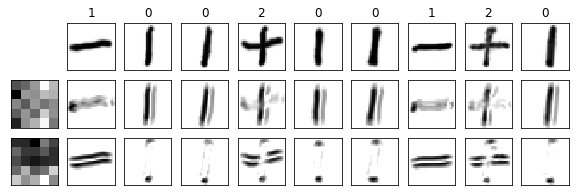

In [9]:
fig = plt.figure(figsize=(10,3))

v_max = np.max(conv_vals)

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], cmap=plt.cm.gray_r)

**[ODE-10]** 합성곱 필터와 풀링 계층을 적용한 결과를 이미지로 출력한다.

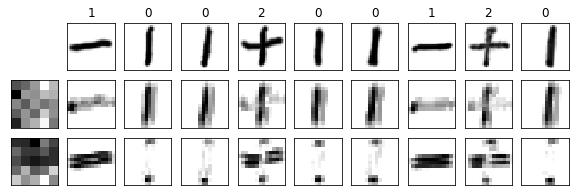

In [10]:
fig = plt.figure(figsize=(10,3))

v_max = np.max(pool_vals)

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,0], cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,1], cmap=plt.cm.gray_r)

In [11]:
sess.close()